In [1]:
# Set your working directory
# setwd("/home/strawberry/Documents/Masters/coculture/Isa") # change the location to where your csv files are

# Load packages
library(dplyr)
library(tidyr)
library(hms)
library(lubridate)
library(ggplot2)
library(purrr)
library(patchwork)
library(tidyverse)
# library(reshape2)
library(stringr)

# library(growthcurver)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



Attaching package: ‘lubridate’


The following object is masked from ‘package:hms’:

    hms


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union


── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ forcats 1.0.1     ✔ stringr 1.5.2
✔ readr   2.1.5     ✔ tibble  3.3.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter()  masks stats::filter()
✖ lubridate::hms() masks hms::hms()
✖ dplyr::lag()     masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [2]:
# Import timepoint 0h
raw <- read.csv("od600_tp0.csv", header = FALSE , skip = 1, na.strings = c("", "NA"))

# Make first column into row names
rownames(raw) <- raw$V1
raw <- raw[, -1]   # drop V1 now that it's row names

# Rename columns as 1–12
colnames(raw) <- as.character(1:12)
head(raw)

# Convert rownames into a column
raw2 <- raw %>%
  tibble::rownames_to_column("Row")

# Pivot longer to get Row + Column + Value
long <- raw2 %>%
  pivot_longer(-Row, names_to = "Col", values_to = "Value") %>%
  mutate(Well = paste0(Row, Col)) %>%
  select(Well, Value)

# keep only non-NA values
long <- long %>% filter(!is.na(Value) & Value != "<NA>") 

head(long)

# Convert decimal commas to numeric with dots
long$Value <- as.numeric(gsub(",", ".", long$Value))

# Transpose into wide format: one row with wells as columns
wide <- long %>%
  pivot_wider(names_from = Well, values_from = Value)

# Add Time column at the front
wide <- wide %>%
  mutate(Time = "00:00:00", .before = 1)

head(wide)

,1,2,3,4,5,6,7,8,9,10,11,12
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
A,-0.007,-0.005,-0.006,-0.004,-0.005,-0.004,-0.004,-0.006,-0.004,-0.007,-0.002,-0.006
B,-0.007,0.053,0.062,0.052,0.056,0.003,0.004,0.070,0.060,0.066,0.070,-0.005
C,-0.006,0.062,0.073,0.062,0.060,0.002,0.002,0.067,0.062,0.064,0.071,-0.004
D,0.012,0.063,0.076,0.071,0.071,-0.003,0.002,0.068,0.076,0.073,0.074,-0.003
E,-0.002,0.116,0.084,0.037,0.081,-0.001,-0.003,0.072,0.072,0.137,0.067,-0.008
F,-0.001,0.090,0.092,0.051,0.078,0.001,0.002,0.078,0.081,0.084,0.072,-0.008


Well,Value
<chr>,<dbl>
A1,-0.007
A2,-0.005
A3,-0.006
A4,-0.004
A5,-0.005
A6,-0.004


Time,A1,A2,A3,A4,A5,A6,A7,A8,A9,⋯,H3,H4,H5,H6,H7,H8,H9,H10,H11,H12
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
00:00:00,-0.007,-0.005,-0.006,-0.004,-0.005,-0.004,-0.004,-0.006,-0.004,⋯,0.005,-0.002,-0.006,-0.004,-0.003,-0.004,-0.004,0.012,-0.004,-0.009


In [3]:
# Import and process incubation measures
od_tp <- read_tsv("od600_tp_SYNERGY.tsv", col_types = cols(.default = "c"))
od_tp <- od_tp %>%
  mutate(across(-Time, ~ as.numeric(gsub(",", ".", .))))

head(od_tp)

Time,T° 600,A1,A2,A3,A4,A5,A6,A7,A8,⋯,H3,H4,H5,H6,H7,H8,H9,H10,H11,H12
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0:29:35,37,0.084,0.085,0.084,0.086,0.085,0.086,0.086,0.085,⋯,0.089,0.086,0.084,0.085,0.086,0.085,0.085,0.093,0.085,0.083
0:59:35,37,0.085,0.085,0.085,0.086,0.086,0.086,0.086,0.086,⋯,0.090,0.086,0.085,0.086,0.087,0.085,0.085,0.093,0.085,0.083
1:29:35,37,0.084,0.085,0.085,0.087,0.086,0.086,0.086,0.085,⋯,0.090,0.086,0.085,0.085,0.086,0.086,0.086,0.093,0.085,0.083
1:59:35,37,0.084,0.086,0.085,0.086,0.086,0.087,0.086,0.086,⋯,0.090,0.087,0.085,0.086,0.087,0.086,0.086,0.093,0.085,0.083
2:29:35,37,0.084,0.086,0.085,0.087,0.086,0.087,0.086,0.086,⋯,0.090,0.087,0.085,0.086,0.087,0.086,0.086,0.093,0.086,0.083
2:59:35,37,0.085,0.086,0.085,0.087,0.086,0.088,0.086,0.085,⋯,0.090,0.087,0.085,0.086,0.087,0.086,0.086,0.093,0.086,0.083


In [4]:
colnames(od_tp)

[1] "Time"   "T° 600" "A1"     "A2"     "A3"     "A4"     "A5"     "A6"    
 [9] "A7"     "A8"     "A9"     "A10"    "A11"    "A12"    "B1"     "B2"    
[17] "B3"     "B4"     "B5"     "B6"     "B7"     "B8"     "B9"     "B10"   
[25] "B11"    "B12"    "C1"     "C2"     "C3"     "C4"     "C5"     "C6"    
[33] "C7"     "C8"     "C9"     "C10"    "C11"    "C12"    "D1"     "D2"    
[41] "D3"     "D4"     "D5"     "D6"     "D7"     "D8"     "D9"     "D10"   
[49] "D11"    "D12"    "E1"     "E2"     "E3"     "E4"     "E5"     "E6"    
[57] "E7"     "E8"     "E9"     "E10"    "E11"    "E12"    "F1"     "F2"    
[65] "F3"     "F4"     "F5"     "F6"     "F7"     "F8"     "F9"     "F10"   
[73] "F11"    "F12"    "G1"     "G2"     "G3"     "G4"     "G5"     "G6"    
[81] "G7"     "G8"     "G9"     "G10"    "G11"    "G12"    "H1"     "H2"    
[89] "H3"     "H4"     "H5"     "H6"     "H7"     "H8"     "H9"     "H10"   
[97] "H11"    "H12"

In [6]:
column_name <- "T° 600"

if (column_name %in% names(od_tp)) {
  od_tp <- subset(od_tp, select = -get(column_name))
  print(paste("Column '", column_name, "' removed.", sep = ""))
} else {
  print(paste("Column '", column_name, "' not found.", sep = ""))
}

head(od_tp)

[1] "Column 'T° 600' removed."


Time,A1,A2,A3,A4,A5,A6,A7,A8,A9,⋯,H3,H4,H5,H6,H7,H8,H9,H10,H11,H12
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0:29:35,0.084,0.085,0.084,0.086,0.085,0.086,0.086,0.085,0.085,⋯,0.089,0.086,0.084,0.085,0.086,0.085,0.085,0.093,0.085,0.083
0:59:35,0.085,0.085,0.085,0.086,0.086,0.086,0.086,0.086,0.085,⋯,0.090,0.086,0.085,0.086,0.087,0.085,0.085,0.093,0.085,0.083
1:29:35,0.084,0.085,0.085,0.087,0.086,0.086,0.086,0.085,0.085,⋯,0.090,0.086,0.085,0.085,0.086,0.086,0.086,0.093,0.085,0.083
1:59:35,0.084,0.086,0.085,0.086,0.086,0.087,0.086,0.086,0.085,⋯,0.090,0.087,0.085,0.086,0.087,0.086,0.086,0.093,0.085,0.083
2:29:35,0.084,0.086,0.085,0.087,0.086,0.087,0.086,0.086,0.086,⋯,0.090,0.087,0.085,0.086,0.087,0.086,0.086,0.093,0.086,0.083
2:59:35,0.085,0.086,0.085,0.087,0.086,0.088,0.086,0.085,0.086,⋯,0.090,0.087,0.085,0.086,0.087,0.086,0.086,0.093,0.086,0.083


In [7]:
# Combine both dataframes
first_row <- wide[1, ] # take first row
combined_od <- rbind(first_row, od_tp) # copy it up top on od_tp
head(combined_od)

Time,A1,A2,A3,A4,A5,A6,A7,A8,A9,⋯,H3,H4,H5,H6,H7,H8,H9,H10,H11,H12
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
00:00:00,-0.007,-0.005,-0.006,-0.004,-0.005,-0.004,-0.004,-0.006,-0.004,⋯,0.005,-0.002,-0.006,-0.004,-0.003,-0.004,-0.004,0.012,-0.004,-0.009
0:29:35,0.084,0.085,0.084,0.086,0.085,0.086,0.086,0.085,0.085,⋯,0.089,0.086,0.084,0.085,0.086,0.085,0.085,0.093,0.085,0.083
0:59:35,0.085,0.085,0.085,0.086,0.086,0.086,0.086,0.086,0.085,⋯,0.090,0.086,0.085,0.086,0.087,0.085,0.085,0.093,0.085,0.083
1:29:35,0.084,0.085,0.085,0.087,0.086,0.086,0.086,0.085,0.085,⋯,0.090,0.086,0.085,0.085,0.086,0.086,0.086,0.093,0.085,0.083
1:59:35,0.084,0.086,0.085,0.086,0.086,0.087,0.086,0.086,0.085,⋯,0.090,0.087,0.085,0.086,0.087,0.086,0.086,0.093,0.085,0.083
2:29:35,0.084,0.086,0.085,0.087,0.086,0.087,0.086,0.086,0.086,⋯,0.090,0.087,0.085,0.086,0.087,0.086,0.086,0.093,0.086,0.083


In [8]:
od_tp <- combined_od

In [9]:
# Split df into two: classical M9 (cols: Time, 1-5) and modified M9 (cols: Time, 6-12)
# Define plate rows and column ranges
rows <- LETTERS[1:8]  # A–H
cols_classical <- 1:6
cols_modified  <- 7:12

# Generate well names for each group
wells_classical <- as.vector(outer(rows, cols_classical, paste0))
wells_modified  <- as.vector(outer(rows, cols_modified, paste0))

# Split into two subsets
od_m9_classical <- od_tp %>%
  select(Time, all_of(wells_classical))

od_m9_modified <- od_tp %>%
  select(Time, all_of(wells_modified))

In [10]:
head(od_m9_classical)
head(od_m9_modified)

Time,A1,B1,C1,D1,E1,F1,G1,H1,A2,⋯,G5,H5,A6,B6,C6,D6,E6,F6,G6,H6
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
00:00:00,-0.007,-0.007,-0.006,0.012,-0.002,-0.001,0.000,-0.003,-0.005,⋯,0.084,-0.006,-0.004,0.003,0.002,-0.003,-0.001,0.001,0.002,-0.004
0:29:35,0.084,0.084,0.084,0.093,0.086,0.087,0.087,0.086,0.085,⋯,0.128,0.084,0.086,0.089,0.088,0.085,0.087,0.088,0.089,0.085
0:59:35,0.085,0.084,0.085,0.093,0.087,0.087,0.087,0.087,0.085,⋯,0.136,0.085,0.086,0.089,0.088,0.086,0.087,0.088,0.089,0.086
1:29:35,0.084,0.084,0.085,0.093,0.087,0.087,0.087,0.087,0.085,⋯,0.147,0.085,0.086,0.089,0.088,0.086,0.087,0.088,0.089,0.085
1:59:35,0.084,0.084,0.085,0.093,0.087,0.088,0.087,0.087,0.086,⋯,0.161,0.085,0.087,0.089,0.088,0.086,0.087,0.088,0.088,0.086
2:29:35,0.084,0.084,0.085,0.093,0.087,0.088,0.087,0.087,0.086,⋯,0.185,0.085,0.087,0.089,0.088,0.086,0.088,0.088,0.088,0.086


Time,A7,B7,C7,D7,E7,F7,G7,H7,A8,⋯,G11,H11,A12,B12,C12,D12,E12,F12,G12,H12
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
00:00:00,-0.004,0.004,0.002,0.002,-0.003,0.002,0.001,-0.003,-0.006,⋯,0.076,-0.004,-0.006,-0.005,-0.004,-0.003,-0.008,-0.008,-0.008,-0.009
0:29:35,0.086,0.088,0.088,0.086,0.086,0.088,0.089,0.086,0.085,⋯,0.127,0.085,0.085,0.085,0.086,0.086,0.084,0.083,0.084,0.083
0:59:35,0.086,0.088,0.088,0.087,0.086,0.088,0.089,0.087,0.086,⋯,0.138,0.085,0.085,0.085,0.086,0.086,0.084,0.083,0.084,0.083
1:29:35,0.086,0.088,0.088,0.087,0.086,0.088,0.089,0.086,0.085,⋯,0.151,0.085,0.085,0.085,0.087,0.087,0.084,0.084,0.084,0.083
1:59:35,0.086,0.088,0.088,0.087,0.087,0.088,0.089,0.087,0.086,⋯,0.171,0.085,0.085,0.085,0.087,0.087,0.085,0.084,0.084,0.083
2:29:35,0.086,0.088,0.089,0.087,0.087,0.088,0.090,0.087,0.086,⋯,0.198,0.086,0.086,0.086,0.087,0.087,0.085,0.084,0.084,0.083


In [11]:
# --- Helper function to reshape and annotate ---
reshape_od <- function(df, medium_label) {
  df %>%
    pivot_longer(-Time, names_to = "Well", values_to = "OD") %>%
    mutate(
      Medium = medium_label,
      Well = str_trim(Well),  # clean any spaces
      Row = str_extract(Well, "^[A-H]"),
      Col = as.numeric(str_extract(Well, "\\d+")),  # correctly capture digits
      Carbon = case_when(
        Col %in% c(2, 8)  ~ "M9_GLU",
        Col %in% c(3, 9)  ~ "M9_SIA",
        Col %in% c(4, 10) ~ "M9_GMP",
        Col %in% c(5, 11) ~ "M9",
        Col %in% c(6, 7) ~ "Blank",
        TRUE ~ NA_character_
      ),
      Strain = case_when(
        Row %in% c("B", "C", "D") ~ "1253",
        Row %in% c("E", "F", "G") ~ "1956",
        TRUE ~ NA_character_
      ),
      OD = as.numeric(OD)
    )
}

# Apply to both
od_long_classical <- reshape_od(od_m9_classical, "M9_classical")
od_long_modified  <- reshape_od(od_m9_modified, "M9_modified")

# Combine
od_long_all <- bind_rows(od_long_classical, od_long_modified)

In [12]:
print("Classical M9 Medium")
head(od_long_classical)
tail(od_long_classical)

print("Modified M9 Medium")
head(od_long_classical)
tail(od_long_classical)

[1] "Classical M9 Medium"


Time,Well,OD,Medium,Row,Col,Carbon,Strain
<chr>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<chr>,<chr>
00:00:00,A1,-0.007,M9_classical,A,1,NA,NA
00:00:00,B1,-0.007,M9_classical,B,1,NA,1253
00:00:00,C1,-0.006,M9_classical,C,1,NA,1253
00:00:00,D1,0.012,M9_classical,D,1,NA,1253
00:00:00,E1,-0.002,M9_classical,E,1,NA,1956
00:00:00,F1,-0.001,M9_classical,F,1,NA,1956


Time,Well,OD,Medium,Row,Col,Carbon,Strain
<chr>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<chr>,<chr>
24:29:35,C6,0.088,M9_classical,C,6,Blank,1253
24:29:35,D6,0.087,M9_classical,D,6,Blank,1253
24:29:35,E6,0.087,M9_classical,E,6,Blank,1956
24:29:35,F6,0.088,M9_classical,F,6,Blank,1956
24:29:35,G6,0.089,M9_classical,G,6,Blank,1956
24:29:35,H6,0.086,M9_classical,H,6,Blank,NA


[1] "Modified M9 Medium"


Time,Well,OD,Medium,Row,Col,Carbon,Strain
<chr>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<chr>,<chr>
00:00:00,A1,-0.007,M9_classical,A,1,NA,NA
00:00:00,B1,-0.007,M9_classical,B,1,NA,1253
00:00:00,C1,-0.006,M9_classical,C,1,NA,1253
00:00:00,D1,0.012,M9_classical,D,1,NA,1253
00:00:00,E1,-0.002,M9_classical,E,1,NA,1956
00:00:00,F1,-0.001,M9_classical,F,1,NA,1956


Time,Well,OD,Medium,Row,Col,Carbon,Strain
<chr>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<chr>,<chr>
24:29:35,C6,0.088,M9_classical,C,6,Blank,1253
24:29:35,D6,0.087,M9_classical,D,6,Blank,1253
24:29:35,E6,0.087,M9_classical,E,6,Blank,1956
24:29:35,F6,0.088,M9_classical,F,6,Blank,1956
24:29:35,G6,0.089,M9_classical,G,6,Blank,1956
24:29:35,H6,0.086,M9_classical,H,6,Blank,NA


In [13]:
od_long_classical$Time <- time_length(hms(od_long_classical$Time), unit = "hour")
od_long_modified$Time <- time_length(hms(od_long_modified$Time), unit = "hour")
od_long_all$Time <- time_length(hms(od_long_all$Time), unit = "hour")

In [14]:
# Remove unwanted wells
od_long_all <- od_long_all %>%
  filter(
    !Row %in% c("A", "H"),        # remove top/bottom rows
    !Col %in% c(1, 12),           # remove side columns
    !is.na(Carbon),               # ensure only real wells
    !is.na(Strain)
  )

od_long_classical <- od_long_classical %>%
  filter(
    !Row %in% c("A", "H"),        # remove top/bottom rows
    !Col %in% c(1, 12),           # remove side columns
    !is.na(Carbon),               # ensure only real wells
    !is.na(Strain)
  )

od_long_modified <- od_long_modified %>%
  filter(
    !Row %in% c("A", "H"),        # remove top/bottom rows
    !Col %in% c(1, 12),           # remove side columns
    !is.na(Carbon),               # ensure only real wells
    !is.na(Strain)
  )

In [15]:
head(od_long_modified)
head(od_long_classical)

Time,Well,OD,Medium,Row,Col,Carbon,Strain
<dbl>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<chr>,<chr>
0,B7,0.004,M9_modified,B,7,Blank,1253
0,C7,0.002,M9_modified,C,7,Blank,1253
0,D7,0.002,M9_modified,D,7,Blank,1253
0,E7,-0.003,M9_modified,E,7,Blank,1956
0,F7,0.002,M9_modified,F,7,Blank,1956
0,G7,0.001,M9_modified,G,7,Blank,1956


Time,Well,OD,Medium,Row,Col,Carbon,Strain
<dbl>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<chr>,<chr>
0,B2,0.053,M9_classical,B,2,M9_GLU,1253
0,C2,0.062,M9_classical,C,2,M9_GLU,1253
0,D2,0.063,M9_classical,D,2,M9_GLU,1253
0,E2,0.116,M9_classical,E,2,M9_GLU,1956
0,F2,0.090,M9_classical,F,2,M9_GLU,1956
0,G2,0.125,M9_classical,G,2,M9_GLU,1956


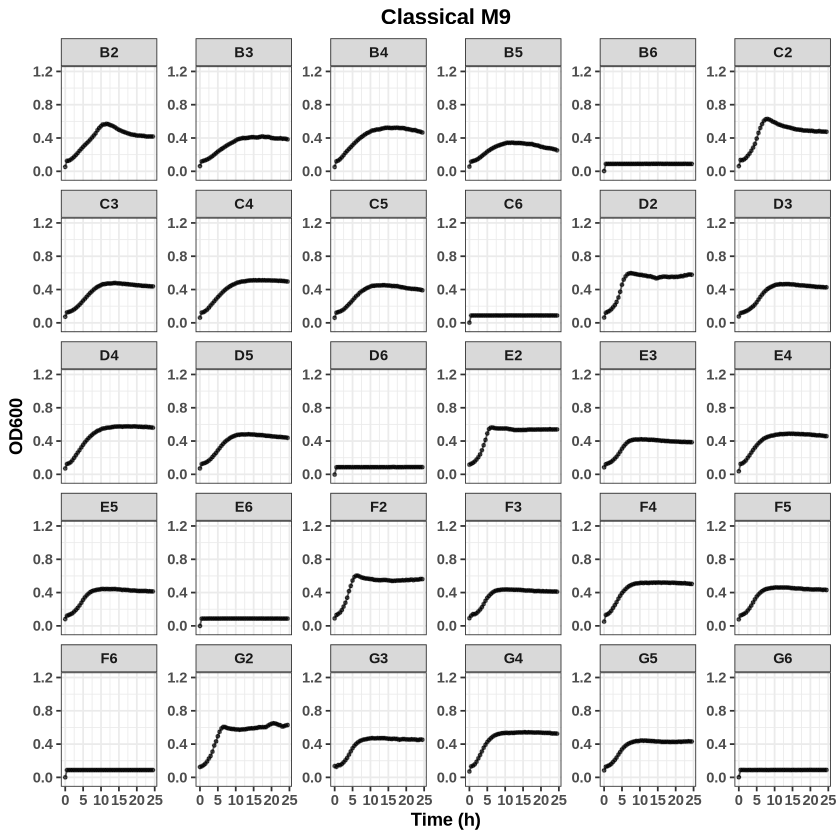

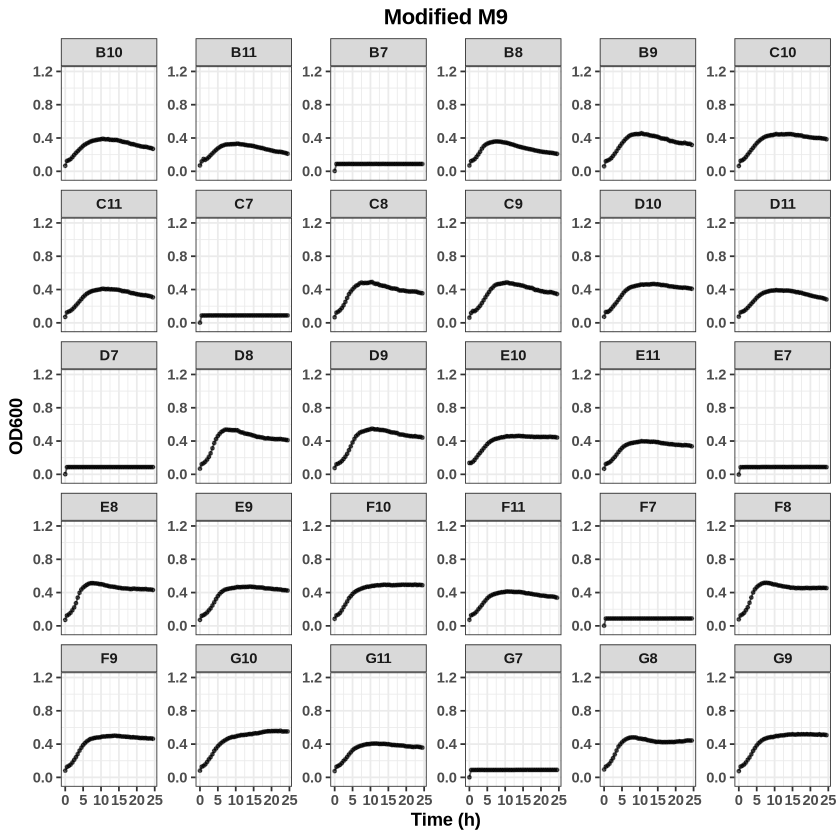

In [16]:
a <- ggplot(od_long_classical, aes(x = Time, y = OD)) +
  geom_point(size = 0.7, alpha = 0.6) +
  geom_line(alpha = 0.6) +
  facet_wrap(~Well, scales = "free_y") +
  labs(
    x = "Time (h)",
    y = "OD600",
    title = "Classical M9"
  ) +
  scale_y_continuous(limits = c(-0.05, 1.2)) +
  theme_bw() +
  theme(
    text = element_text(face = "bold"),            # all text bold
    strip.text = element_text(face = "bold"),      # facet labels bold
    axis.title = element_text(face = "bold"),      # axis titles bold
    axis.text = element_text(face = "bold"),       # axis numbers bold
    plot.title = element_text(face = "bold", hjust = 0.5) # center + bold title
  )
a

b <- ggplot(od_long_modified, aes(x = Time, y = OD)) +
  geom_point(size = 0.7, alpha = 0.6) +
  geom_line(alpha = 0.6) +
  facet_wrap(~Well, scales = "free_y") +
  labs(
    x = "Time (h)",
    y = "OD600",
    title = "Modified M9"
  ) +
  scale_y_continuous(limits = c(-0.05, 1.2)) +
  theme_bw() +
  theme(
    text = element_text(face = "bold"),            # all text bold
    strip.text = element_text(face = "bold"),      # facet labels bold
    axis.title = element_text(face = "bold"),      # axis titles bold
    axis.text = element_text(face = "bold"),       # axis numbers bold
    plot.title = element_text(face = "bold", hjust = 0.5) # center + bold title
  )
b

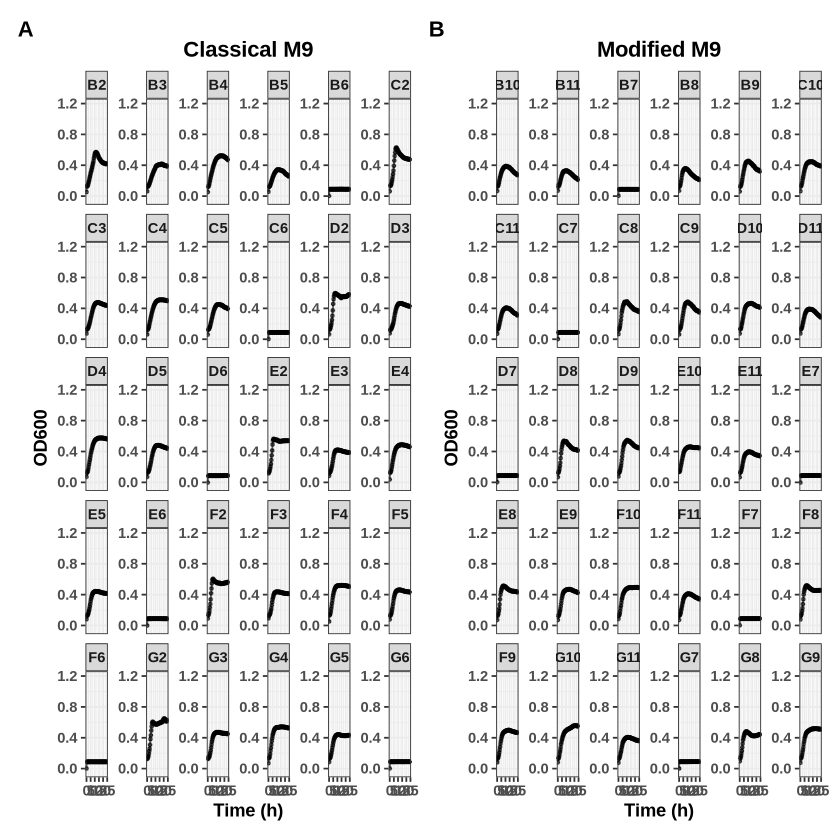

In [17]:
library(patchwork)

# Combine with shared legend and tag panels
combined_plot <- (
  a + b +
  plot_layout(guides = "collect") &  # collect one legend for both
  theme(legend.position = "bottom")  # put legend below
) +
  plot_annotation(
    tag_levels = 'A',                # label panels as A, B
  )

# Display
combined_plot


In [53]:
ggsave("growth_curves_well_classicM9.png", a,
       width = 10, height = 10, dpi = 300)

ggsave("growth_curves_well_modifM9.png", b,
       width = 10, height = 10, dpi = 300)

ggsave("growth_curves_well_combined.png", combined_plot,
       width = 14, height = 10, dpi = 300)

In [44]:
# # Remove blanks
# od_long_modified <- od_long_modified %>%
#   filter(
#     !str_detect(Well, "(6|7)$"),       # remove wells ending with 6 or 9
#     !is.na(Carbon),                    # remove rows with NA in Carbon
#     !is.na(Strain)                     # remove rows with NA in Strain
#   )

# head(od_long_modified)


# od_long_classic <- od_long_classical %>%
#   filter(
#     !str_detect(Well, "(6|7)$"),       # remove wells ending with 6 or 9
#     !is.na(Carbon),                    # remove rows with NA in Carbon
#     !is.na(Strain)                     # remove rows with NA in Strain
#   )

# head(od_long_classic)

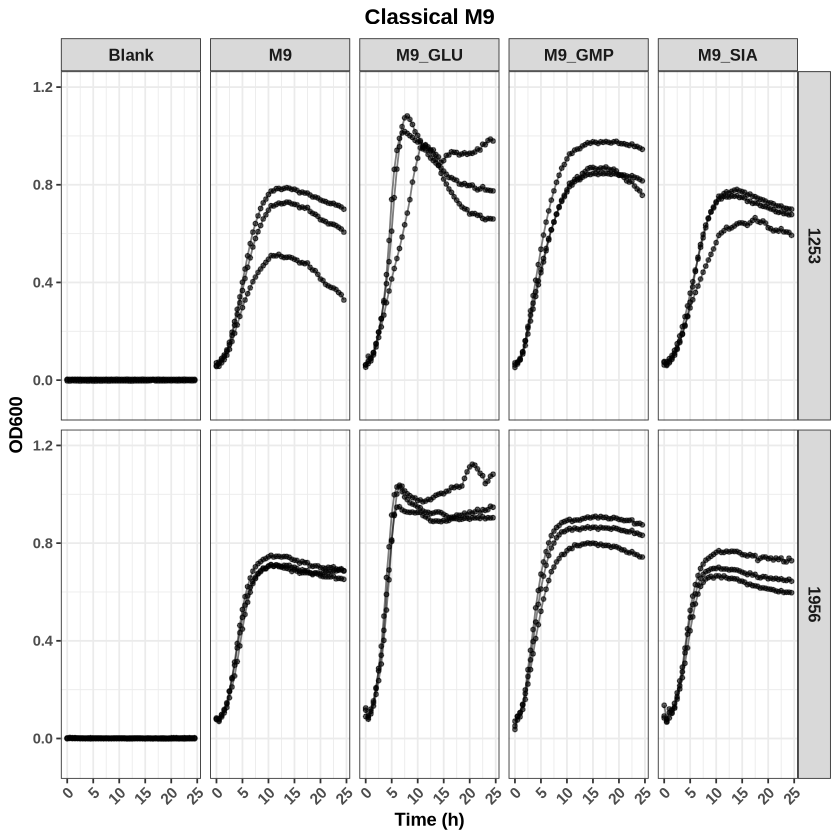

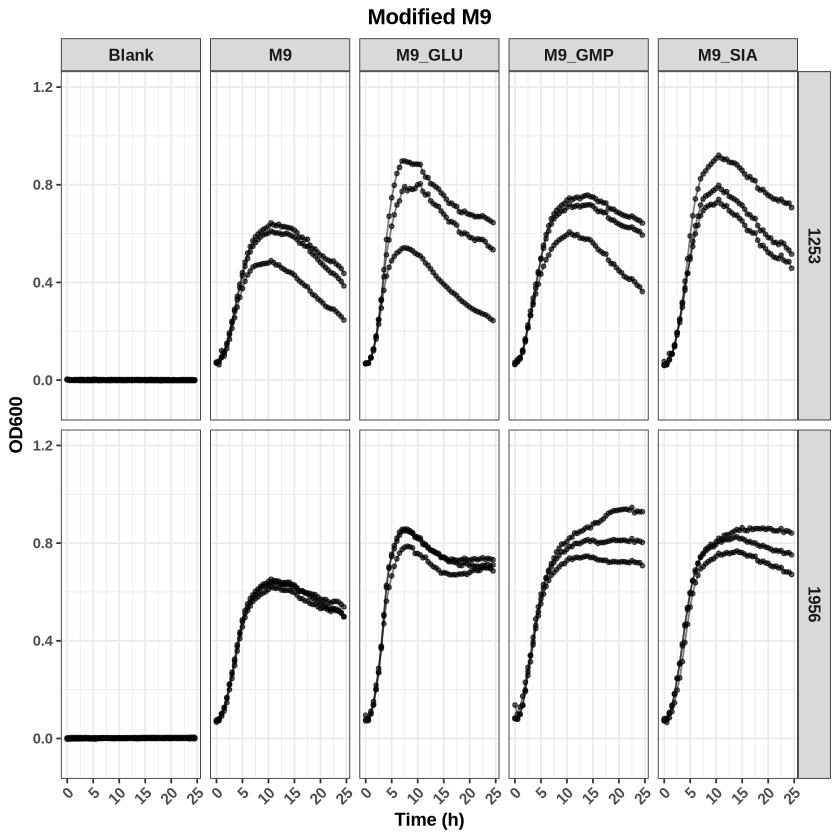

In [14]:
growth_plotA <- ggplot(od_long_classical, aes(x = Time, y = OD, group = Well)) +
  geom_point(size = 1, alpha = 0.6) +       # raw measurements
  geom_line(alpha = 0.5) +                  # connect points per well
  facet_grid(Strain ~ Carbon, scales = "free_y") +  # rows = Strain, cols = Carbon
  labs(
    x = "Time (h)",
    y = "OD600",
    title = "Classical M9") +
  scale_y_continuous(limits = c(-0.1, 1.2)) +  # fix y-axis across all facets
  theme_bw() +
  theme(
    axis.text.x = element_text(angle = 45, hjust = 1, face = "bold"),
    axis.text.y = element_text(face = "bold"),
    axis.title = element_text(face = "bold"),
    plot.title = element_text(face = "bold", hjust = 0.5),
    strip.text = element_text(size = 10, face = "bold"),
    legend.text = element_text(face = "bold"),
    legend.title = element_text(face = "bold")
  )

growth_plotA

growth_plotB <- ggplot(od_long_modified, aes(x = Time, y = OD, group = Well)) +
  geom_point(size = 1, alpha = 0.6) +       # raw measurements
  geom_line(alpha = 0.5) +                  # connect points per well
  facet_grid(Strain ~ Carbon, scales = "free_y") +  # rows = Strain, cols = Carbon
  labs(
    x = "Time (h)",
    y = "OD600",
    title = "Modified M9") +
  scale_y_continuous(limits = c(-0.1, 1.2)) +  # fix y-axis across all facets
  theme_bw() +
  theme(
    axis.text.x = element_text(angle = 45, hjust = 1, face = "bold"),
    axis.text.y = element_text(face = "bold"),
    axis.title = element_text(face = "bold"),
    plot.title = element_text(face = "bold", hjust = 0.5),
    strip.text = element_text(size = 10, face = "bold"),
    legend.text = element_text(face = "bold"),
    legend.title = element_text(face = "bold")
  )

growth_plotB

In [57]:
ggsave("growth_curves_medium_classicM9.png", growth_plotA,
       width = 10, height = 10, dpi = 300)

ggsave("growth_curves_medium_modifM9.png", growth_plotB,
       width = 10, height = 10, dpi = 300)

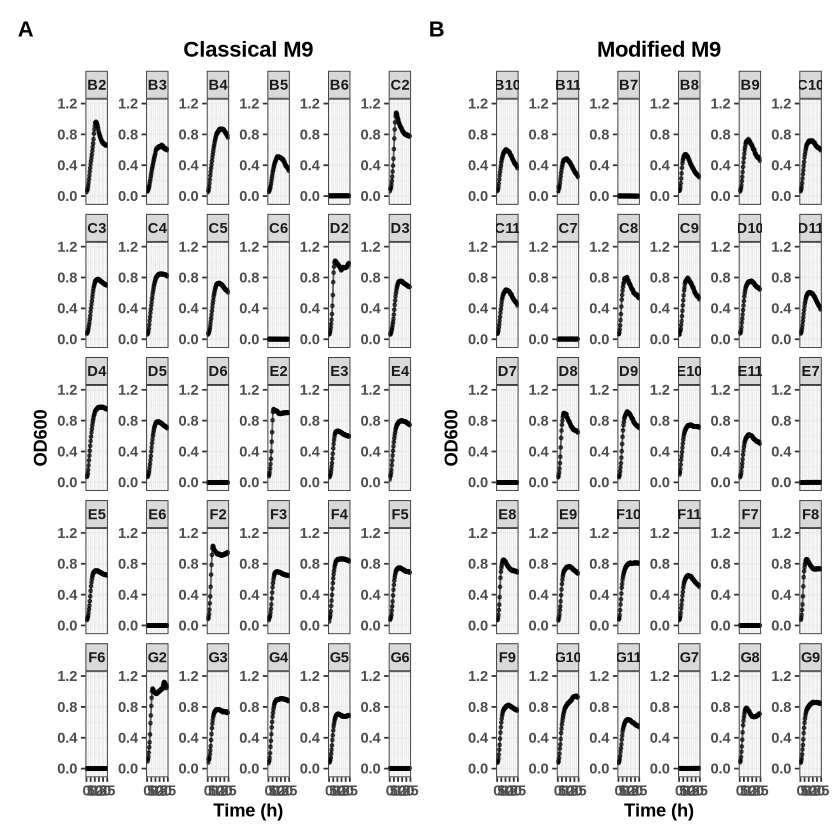

In [58]:
combined_plot <- (
  a + b +
  plot_layout(guides = "collect") &  # collect one legend for both
  theme(legend.position = "bottom")  # put legend below
) +
  plot_annotation(
    tag_levels = 'A',                # label panels as A, B
  )
combined_plot

ggsave("growth_curves_medium_combined.png", combined_plot,
       width = 10, height = 10, dpi = 300)

`geom_smooth()` using formula = 'y ~ x'


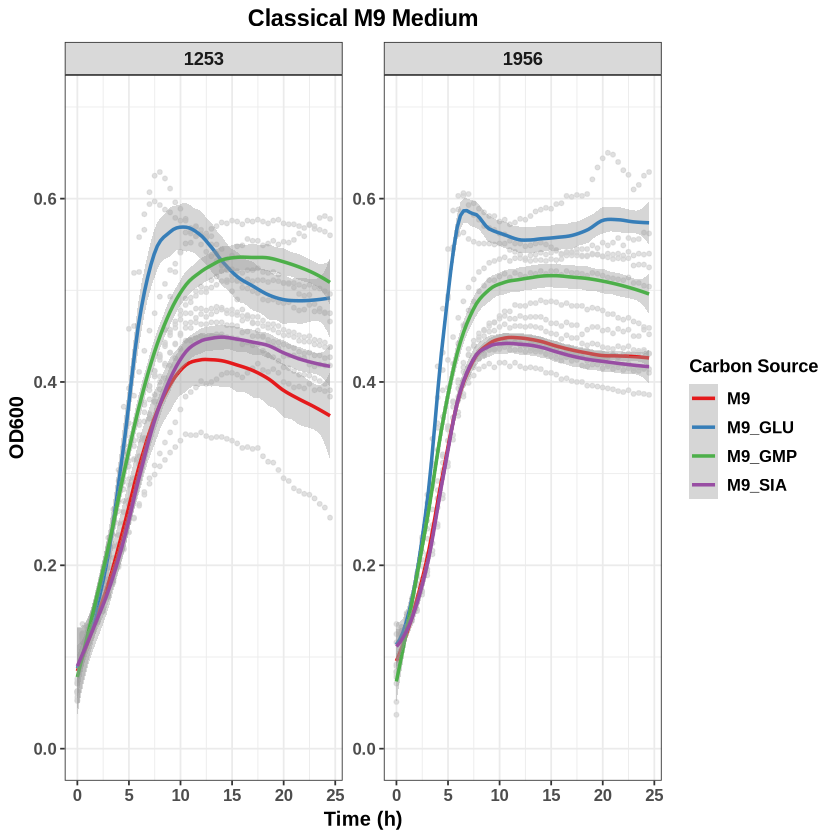

In [21]:
plotA <- ggplot(
  od_long_classical %>%
    filter(!is.na(Carbon), Carbon != "Blank"),  # remove blanks and NAs
  aes(x = Time, y = OD)
) +
  # Raw measurements in light gray
  geom_point(aes(group = Well), color = "lightgray", size = 1.0, alpha = 0.7) +
  # Loess trend colored by Carbon
  geom_smooth(aes(color = Carbon, group = Carbon),
              method = "loess", span = 0.3, se = TRUE, size = 1) +
  facet_wrap(~Strain, scales = "free_y") +
  scale_color_brewer(palette = "Set1") +
  labs(
    x = "Time (h)",
    y = "OD600",
    color = "Carbon Source",
    title = "Classical M9 Medium"
  ) +
  scale_y_continuous(limits = c(0, 0.7)) +  # fix y-axis across all facets
  theme_bw() +
  theme(
    axis.title = element_text(face = "bold", size = 12),
    axis.text = element_text(face = "bold", size = 10),
    strip.text = element_text(face = "bold", size = 11),
    legend.title = element_text(face = "bold", size = 11),
    legend.text = element_text(face = "bold", size = 10),
    plot.title = element_text(face = "bold", size = 14, hjust = 0.5)
  )

plotA

`geom_smooth()` using formula = 'y ~ x'


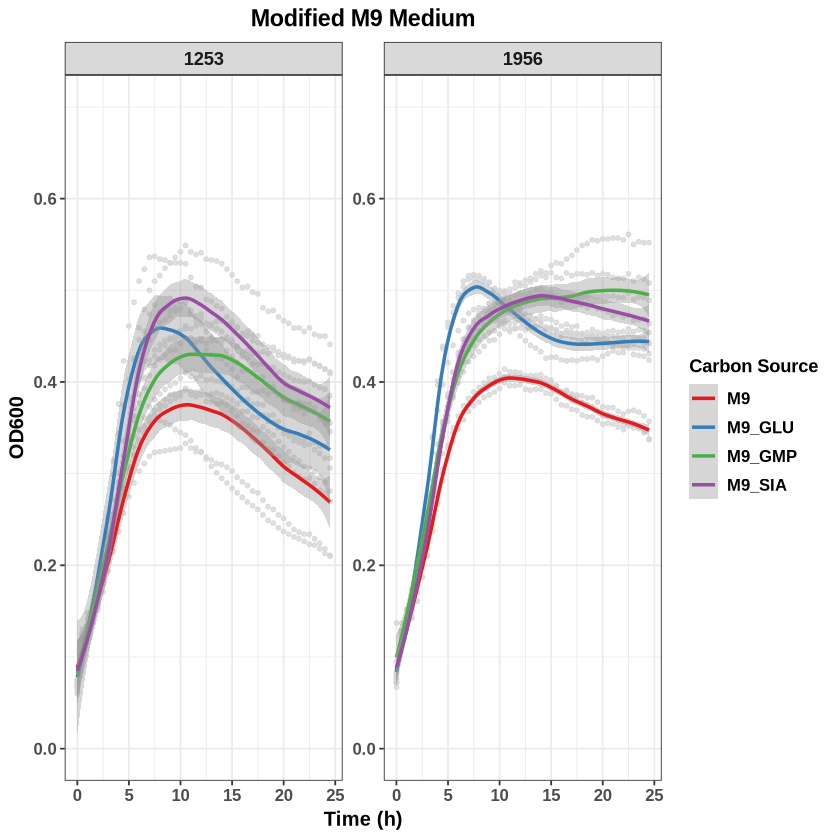

In [22]:
plotB <- ggplot(
  od_long_modified %>%
    filter(!is.na(Carbon), Carbon != "Blank"),  # remove blanks and NAs
  aes(x = Time, y = OD)
) +
  # Raw measurements in light gray
  geom_point(aes(group = Well), color = "lightgray", size = 1.0, alpha = 0.7) +
  # Loess trend colored by Carbon
  geom_smooth(aes(color = Carbon, group = Carbon),
              method = "loess", span = 0.3, se = TRUE, size = 1) +
  facet_wrap(~Strain, scales = "free_y") +
  scale_color_brewer(palette = "Set1") +
  labs(
    x = "Time (h)",
    y = "OD600",
    color = "Carbon Source",
    title = "Modified M9 Medium"
  ) +
  scale_y_continuous(limits = c(0, 0.7)) +  # fix y-axis across all facets
  theme_bw() +
  theme(
    axis.title = element_text(face = "bold", size = 12),
    axis.text = element_text(face = "bold", size = 10),
    strip.text = element_text(face = "bold", size = 11),
    legend.title = element_text(face = "bold", size = 11),
    legend.text = element_text(face = "bold", size = 10),
    plot.title = element_text(face = "bold", size = 14, hjust = 0.5)
  )

plotB

In [23]:
ggsave("growth_curves_SYNERGY_24h_class.png", plotA, width = 12, height = 6, dpi = 300)
ggsave("growth_curves_SYNERGY_24h_modif.png", plotB, width = 12, height = 6, dpi = 300)

`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'


`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'


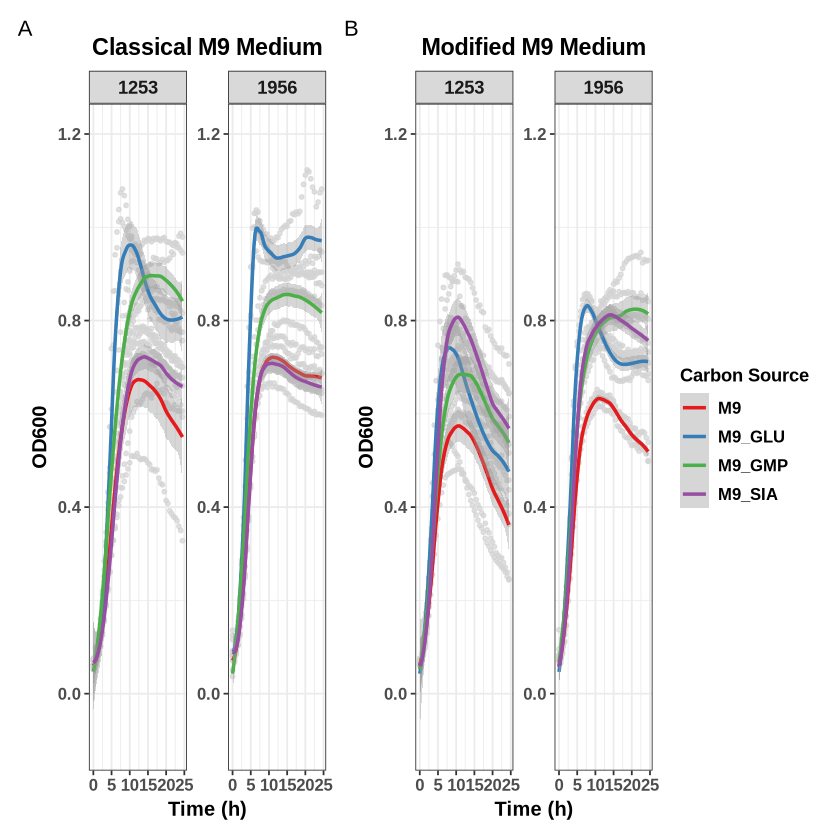

In [68]:
combined <- plotA + plotB + 
  plot_layout(guides = "collect") +  # collect legends from all plots
  plot_annotation(tag_levels = "A")  # label panels

combined

In [69]:
ggsave("combined_growth_curves_SYNERGY_24h.png", combined, width = 12, height = 6, dpi = 300)

`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'


In [71]:
##### doing the same but for JosÉ Freire's plate reader results
####### also cutting just the first 24h

In [73]:
od_tp <- read_tsv("od600_tp_EPOCH2.tsv", col_types = cols(.default = "c"))
# Split df into two: classical M9 (cols: Time, 1-5) and modified M9 (cols: Time, 6-12)
# Define plate rows and column ranges
rows <- LETTERS[1:8]  # A–H
cols_classical <- 1:6
cols_modified  <- 7:12

# Generate well names for each group
wells_classical <- as.vector(outer(rows, cols_classical, paste0))
wells_modified  <- as.vector(outer(rows, cols_modified, paste0))

# Split into two subsets
od_m9_classical <- od_tp %>%
  select(Time, all_of(wells_classical))

od_m9_modified <- od_tp %>%
  select(Time, all_of(wells_modified))
  
head(od_m9_classical)
head(od_m9_modified)


# --- Helper function to reshape and annotate ---
reshape_od <- function(df, medium_label) {
  df %>%
    pivot_longer(-Time, names_to = "Well", values_to = "OD") %>%
    mutate(
      Medium = medium_label,
      Well = str_trim(Well),  # clean any spaces
      Row = str_extract(Well, "^[A-H]"),
      Col = as.numeric(str_extract(Well, "\\d+")),  # correctly capture digits
      Carbon = case_when(
        Col %in% c(2, 8)  ~ "M9_GLU",
        Col %in% c(3, 9)  ~ "M9_SIA",
        Col %in% c(4, 10) ~ "M9_GMP",
        Col %in% c(5, 11) ~ "M9",
        Col %in% c(6, 7) ~ "Blank",
        TRUE ~ NA_character_
      ),
      Strain = case_when(
        Row %in% c("B", "C", "D") ~ "1253",
        Row %in% c("E", "F", "G") ~ "1956",
        TRUE ~ NA_character_
      ),
      OD = as.numeric(OD)
    )
}

# Apply to both
od_long_classical <- reshape_od(od_m9_classical, "M9_classical")
od_long_modified  <- reshape_od(od_m9_modified, "M9_modified")

# Combine
od_long_all <- bind_rows(od_long_classical, od_long_modified)


print("Classical M9 Medium")
head(od_long_classical)
tail(od_long_classical)

print("Modified M9 Medium")
head(od_long_classical)
tail(od_long_classical)


od_long_classical$Time <- time_length(hms(od_long_classical$Time), unit = "hour")
od_long_modified$Time <- time_length(hms(od_long_modified$Time), unit = "hour")
od_long_all$Time <- time_length(hms(od_long_all$Time), unit = "hour")


# Remove unwanted wells
od_long_all <- od_long_all %>%
  filter(
    !Row %in% c("A", "H"),        # remove top/bottom rows
    !Col %in% c(1, 12),           # remove side columns
    !is.na(Carbon),               # ensure only real wells
    !is.na(Strain)
  )

od_long_classical <- od_long_classical %>%
  filter(
    !Row %in% c("A", "H"),        # remove top/bottom rows
    !Col %in% c(1, 12),           # remove side columns
    !is.na(Carbon),               # ensure only real wells
    !is.na(Strain)
  )

od_long_modified <- od_long_modified %>%
  filter(
    !Row %in% c("A", "H"),        # remove top/bottom rows
    !Col %in% c(1, 12),           # remove side columns
    !is.na(Carbon),               # ensure only real wells
    !is.na(Strain)
  )
  

Time,A1,B1,C1,D1,E1,F1,G1,H1,A2,⋯,G5,H5,A6,B6,C6,D6,E6,F6,G6,H6
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
0:59:16,0.085,0.085,0.084,0.082,0.082,0.082,0.083,0.085,0.084,⋯,0.117,0.084,0.082,0.086,0.087,0.089,0.088,0.087,0.088,0.084
1:59:16,0.085,0.085,0.084,0.082,0.082,0.082,0.083,0.085,0.084,⋯,0.148,0.085,0.083,0.085,0.087,0.09,0.089,0.088,0.088,0.084
2:59:16,0.085,0.086,0.085,0.083,0.082,0.083,0.083,0.085,0.084,⋯,0.181,0.085,0.083,0.085,0.087,0.09,0.089,0.088,0.089,0.084
3:59:16,0.085,0.086,0.084,0.082,0.082,0.082,0.083,0.085,0.085,⋯,0.209,0.084,0.083,0.084,0.087,0.089,0.088,0.087,0.088,0.084
4:59:16,0.086,0.086,0.085,0.082,0.083,0.083,0.083,0.086,0.085,⋯,0.234,0.085,0.083,0.085,0.088,0.09,0.089,0.087,0.088,0.085
5:59:16,0.085,0.085,0.085,0.082,0.082,0.082,0.083,0.085,0.084,⋯,0.26,0.084,0.083,0.085,0.087,0.09,0.089,0.087,0.088,0.084


Time,A7,B7,C7,D7,E7,F7,G7,H7,A8,⋯,G11,H11,A12,B12,C12,D12,E12,F12,G12,H12
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
0:59:16,0.082,0.088,0.088,0.087,0.085,0.084,0.085,0.081,0.085,⋯,0.12,0.083,0.082,0.085,0.082,0.083,0.083,0.084,0.084,0.087
1:59:16,0.082,0.088,0.088,0.087,0.085,0.085,0.086,0.082,0.086,⋯,0.159,0.083,0.083,0.085,0.083,0.083,0.084,0.084,0.084,0.087
2:59:16,0.083,0.088,0.089,0.087,0.085,0.085,0.086,0.082,0.086,⋯,0.201,0.083,0.083,0.086,0.083,0.084,0.084,0.084,0.084,0.087
3:59:16,0.082,0.088,0.088,0.087,0.085,0.085,0.086,0.082,0.086,⋯,0.232,0.083,0.083,0.086,0.083,0.084,0.084,0.084,0.084,0.088
4:59:16,0.083,0.088,0.089,0.087,0.085,0.085,0.086,0.082,0.086,⋯,0.266,0.084,0.083,0.086,0.083,0.084,0.084,0.084,0.084,0.088
5:59:16,0.083,0.088,0.088,0.087,0.085,0.085,0.086,0.082,0.086,⋯,0.314,0.083,0.083,0.086,0.083,0.084,0.084,0.084,0.084,0.088


[1] "Classical M9 Medium"


Time,Well,OD,Medium,Row,Col,Carbon,Strain
<chr>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<chr>,<chr>
0:59:16,A1,0.085,M9_classical,A,1,NA,NA
0:59:16,B1,0.085,M9_classical,B,1,NA,1253
0:59:16,C1,0.084,M9_classical,C,1,NA,1253
0:59:16,D1,0.082,M9_classical,D,1,NA,1253
0:59:16,E1,0.082,M9_classical,E,1,NA,1956
0:59:16,F1,0.082,M9_classical,F,1,NA,1956


Time,Well,OD,Medium,Row,Col,Carbon,Strain
<chr>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<chr>,<chr>
0:00:00,C6,NA,M9_classical,C,6,Blank,1253
0:00:00,D6,NA,M9_classical,D,6,Blank,1253
0:00:00,E6,NA,M9_classical,E,6,Blank,1956
0:00:00,F6,NA,M9_classical,F,6,Blank,1956
0:00:00,G6,NA,M9_classical,G,6,Blank,1956
0:00:00,H6,NA,M9_classical,H,6,Blank,NA


[1] "Modified M9 Medium"


Time,Well,OD,Medium,Row,Col,Carbon,Strain
<chr>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<chr>,<chr>
0:59:16,A1,0.085,M9_classical,A,1,NA,NA
0:59:16,B1,0.085,M9_classical,B,1,NA,1253
0:59:16,C1,0.084,M9_classical,C,1,NA,1253
0:59:16,D1,0.082,M9_classical,D,1,NA,1253
0:59:16,E1,0.082,M9_classical,E,1,NA,1956
0:59:16,F1,0.082,M9_classical,F,1,NA,1956


Time,Well,OD,Medium,Row,Col,Carbon,Strain
<chr>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<chr>,<chr>
0:00:00,C6,NA,M9_classical,C,6,Blank,1253
0:00:00,D6,NA,M9_classical,D,6,Blank,1253
0:00:00,E6,NA,M9_classical,E,6,Blank,1956
0:00:00,F6,NA,M9_classical,F,6,Blank,1956
0:00:00,G6,NA,M9_classical,G,6,Blank,1956
0:00:00,H6,NA,M9_classical,H,6,Blank,NA


In [75]:
# Remove data after 25h
od_long_classical <- od_long_classical %>%
  filter(Time <= 25)

od_long_modified <- od_long_modified %>%
  filter(Time <= 25)

Warning message:
“Removed 300 rows containing missing values or values outside the scale range (`geom_point()`).”
Warning message:
“Removed 10 rows containing missing values or values outside the scale range (`geom_line()`).”
Warning message:
“Removed 303 rows containing missing values or values outside the scale range (`geom_point()`).”
Warning message:
“Removed 10 rows containing missing values or values outside the scale range (`geom_line()`).”


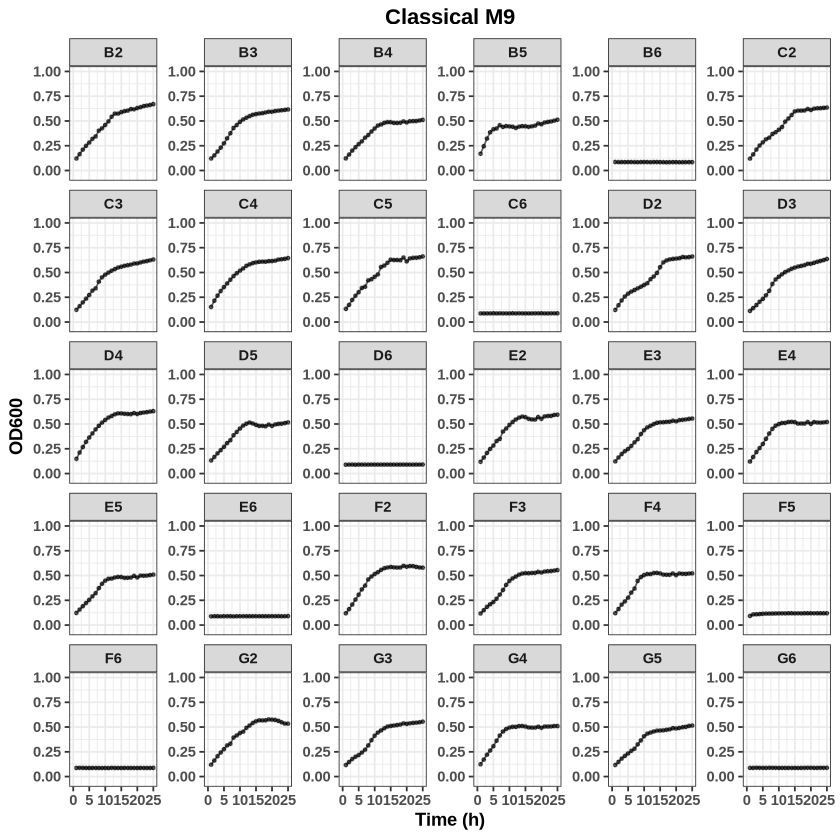

Warning message:
“Removed 300 rows containing missing values or values outside the scale range (`geom_point()`).”
Warning message:
“Removed 10 rows containing missing values or values outside the scale range (`geom_line()`).”
Warning message:
“Removed 303 rows containing missing values or values outside the scale range (`geom_point()`).”
Warning message:
“Removed 10 rows containing missing values or values outside the scale range (`geom_line()`).”


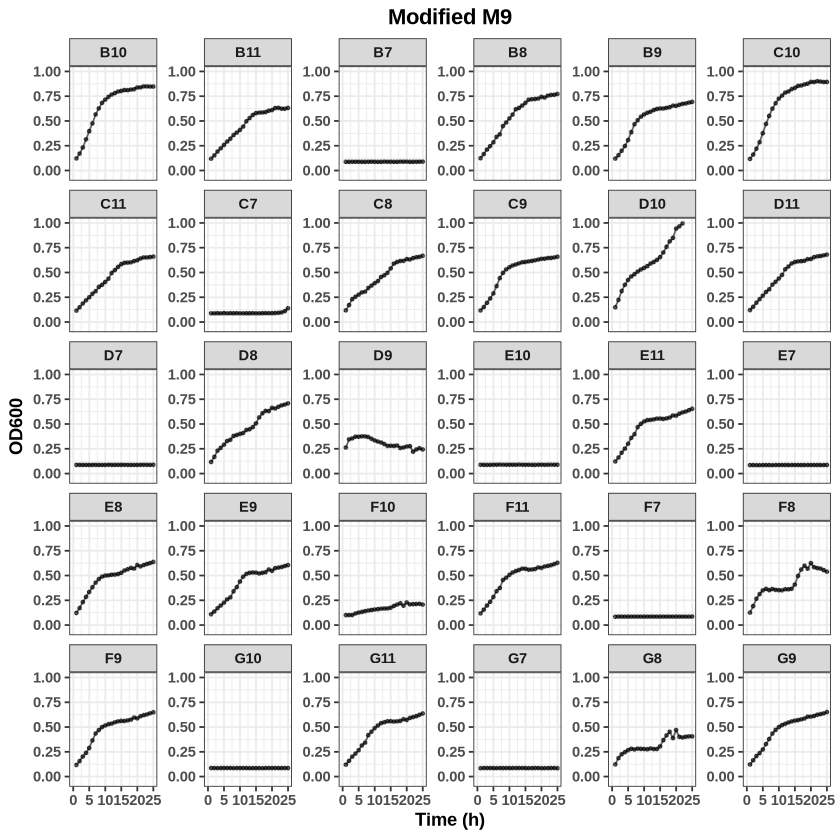

Warning message:
“Removed 300 rows containing missing values or values outside the scale range (`geom_point()`).”
Warning message:
“Removed 10 rows containing missing values or values outside the scale range (`geom_line()`).”
Warning message:
“Removed 303 rows containing missing values or values outside the scale range (`geom_point()`).”
Warning message:
“Removed 10 rows containing missing values or values outside the scale range (`geom_line()`).”
Warning message:
“Removed 300 rows containing missing values or values outside the scale range (`geom_point()`).”
Warning message:
“Removed 10 rows containing missing values or values outside the scale range (`geom_line()`).”
Warning message:
“Removed 303 rows containing missing values or values outside the scale range (`geom_point()`).”
Warning message:
“Removed 10 rows containing missing values or values outside the scale range (`geom_line()`).”


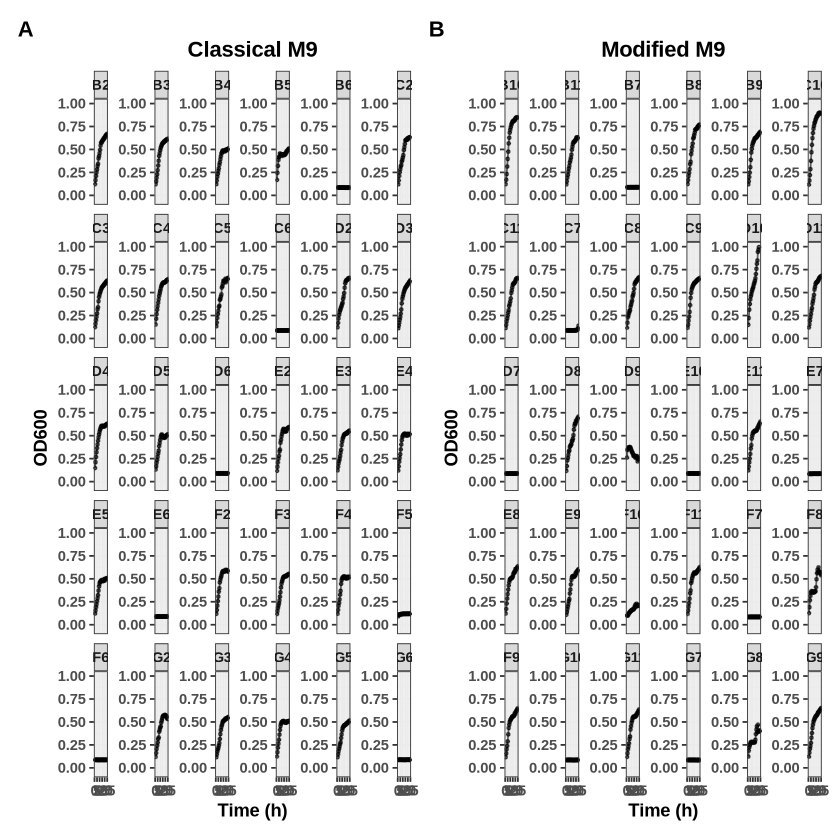

In [82]:
# Plot wells
a <- ggplot(od_long_classical, aes(x = Time, y = OD)) +
  geom_point(size = 0.7, alpha = 0.6) +
  geom_line(alpha = 0.6) +
  facet_wrap(~Well, scales = "free_y") +
  labs(
    x = "Time (h)",
    y = "OD600",
    title = "Classical M9"
  ) +
  scale_y_continuous(limits = c(-0.05, 1)) +
  theme_bw() +
  theme(
    text = element_text(face = "bold"),            # all text bold
    strip.text = element_text(face = "bold"),      # facet labels bold
    axis.title = element_text(face = "bold"),      # axis titles bold
    axis.text = element_text(face = "bold"),       # axis numbers bold
    plot.title = element_text(face = "bold", hjust = 0.5) # center + bold title
  )
a

b <- ggplot(od_long_modified, aes(x = Time, y = OD)) +
  geom_point(size = 0.7, alpha = 0.6) +
  geom_line(alpha = 0.6) +
  facet_wrap(~Well, scales = "free_y") +
  labs(
    x = "Time (h)",
    y = "OD600",
    title = "Modified M9"
  ) +
  scale_y_continuous(limits = c(-0.05, 1)) +
  theme_bw() +
  theme(
    text = element_text(face = "bold"),            # all text bold
    strip.text = element_text(face = "bold"),      # facet labels bold
    axis.title = element_text(face = "bold"),      # axis titles bold
    axis.text = element_text(face = "bold"),       # axis numbers bold
    plot.title = element_text(face = "bold", hjust = 0.5) # center + bold title
  )
b




  
library(patchwork)

# Combine with shared legend and tag panels
combined_plot <- (
  a + b +
  plot_layout(guides = "collect") &  # collect one legend for both
  theme(legend.position = "bottom")  # put legend below
) +
  plot_annotation(
    tag_levels = 'A',                # label panels as A, B
  )

# Display
combined_plot



ggsave("growth_curves_well_classicM9-EPOCH2.png", a,
       width = 10, height = 10, dpi = 300)

ggsave("growth_curves_well_modifM9-EPOCH2.png", b,
       width = 10, height = 10, dpi = 300)

ggsave("growth_curves_well_combined-EPOCH2.png", combined_plot,
       width = 14, height = 10, dpi = 300)
       

Warning message:
“Removed 300 rows containing missing values or values outside the scale range (`geom_point()`).”
Warning message:
“Removed 300 rows containing missing values or values outside the scale range (`geom_line()`).”
Warning message:
“Removed 300 rows containing missing values or values outside the scale range (`geom_point()`).”
Warning message:
“Removed 300 rows containing missing values or values outside the scale range (`geom_line()`).”


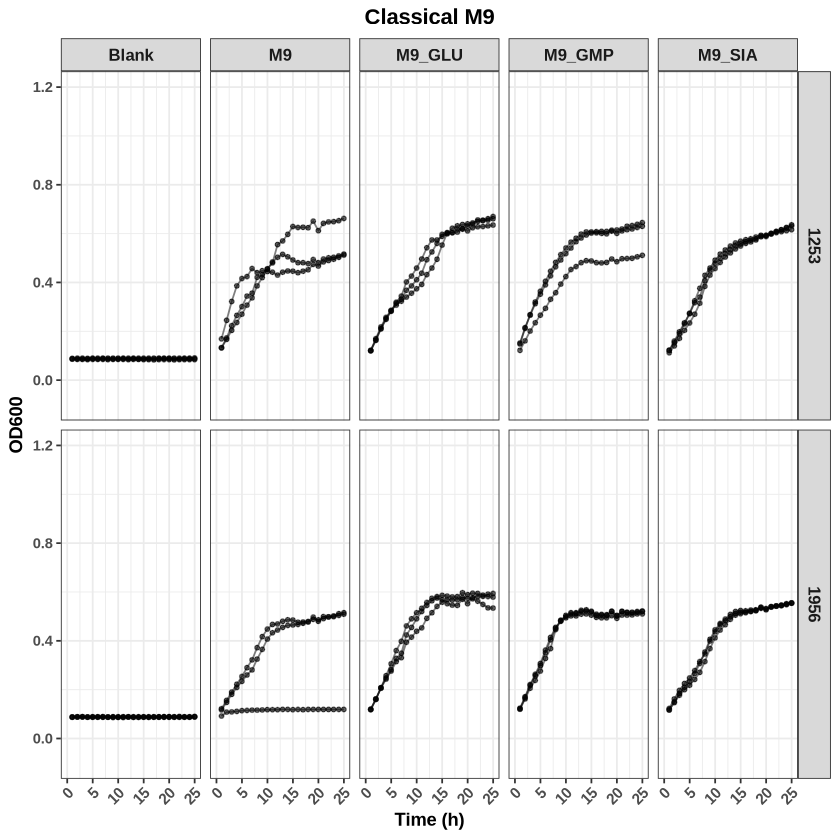

Warning message:
“Removed 300 rows containing missing values or values outside the scale range (`geom_point()`).”
Warning message:
“Removed 300 rows containing missing values or values outside the scale range (`geom_line()`).”
Warning message:
“Removed 300 rows containing missing values or values outside the scale range (`geom_point()`).”
Warning message:
“Removed 300 rows containing missing values or values outside the scale range (`geom_line()`).”
Warning message:
“Removed 300 rows containing missing values or values outside the scale range (`geom_point()`).”
Warning message:
“Removed 10 rows containing missing values or values outside the scale range (`geom_line()`).”
Warning message:
“Removed 303 rows containing missing values or values outside the scale range (`geom_point()`).”
Warning message:
“Removed 10 rows containing missing values or values outside the scale range (`geom_line()`).”


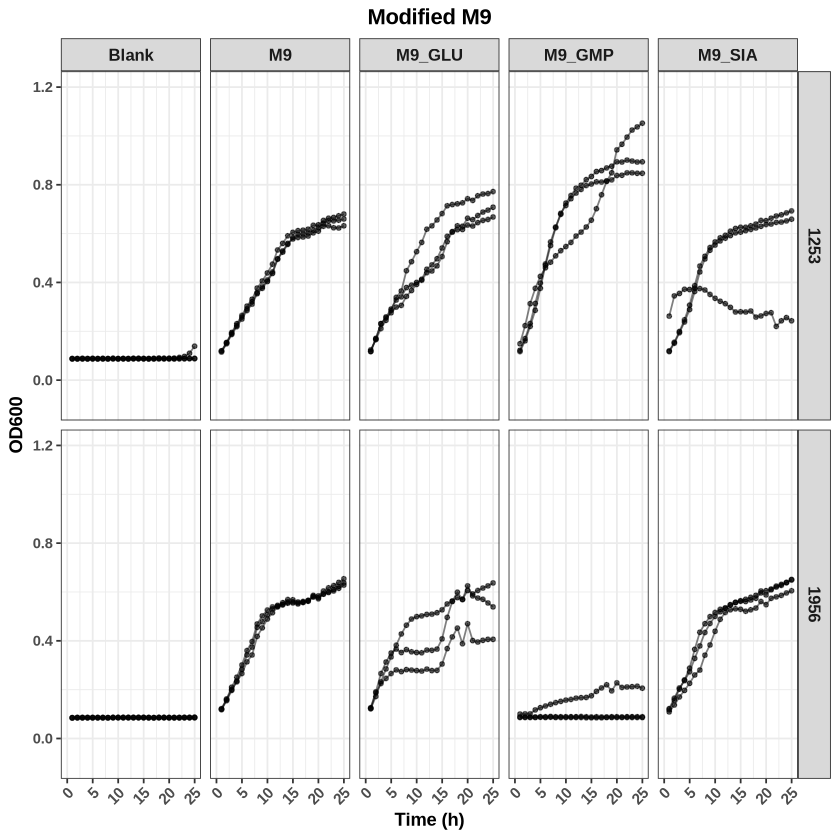

Warning message:
“Removed 300 rows containing missing values or values outside the scale range (`geom_point()`).”
Warning message:
“Removed 10 rows containing missing values or values outside the scale range (`geom_line()`).”
Warning message:
“Removed 303 rows containing missing values or values outside the scale range (`geom_point()`).”
Warning message:
“Removed 10 rows containing missing values or values outside the scale range (`geom_line()`).”


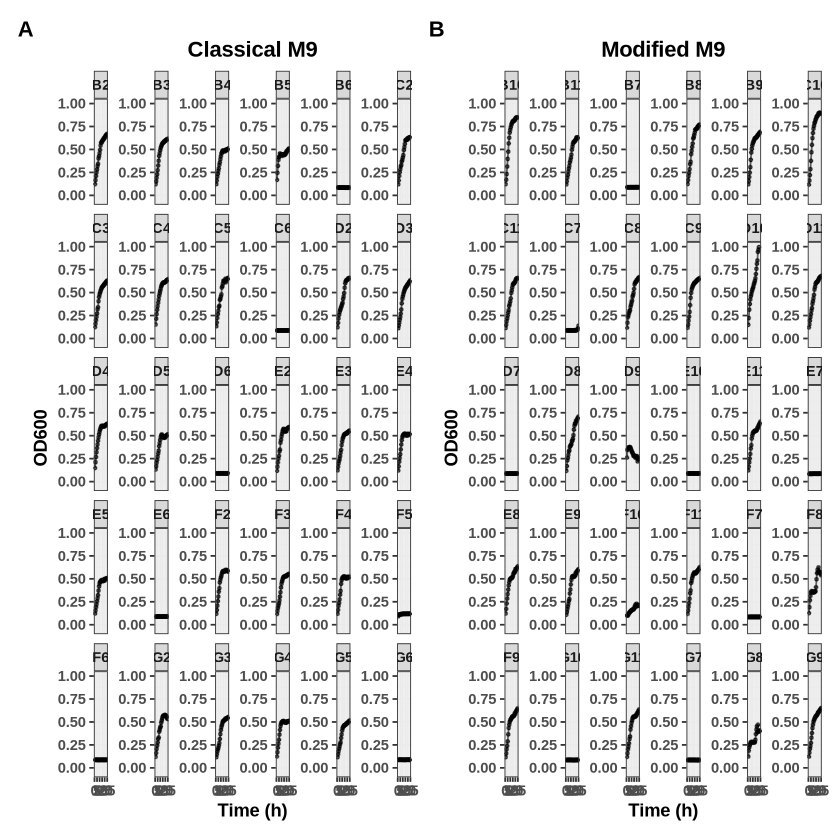

In [83]:
growth_plotA <- ggplot(od_long_classical, aes(x = Time, y = OD, group = Well)) +
  geom_point(size = 1, alpha = 0.6) +       # raw measurements
  geom_line(alpha = 0.5) +                  # connect points per well
  facet_grid(Strain ~ Carbon, scales = "free_y") +  # rows = Strain, cols = Carbon
  labs(
    x = "Time (h)",
    y = "OD600",
    title = "Classical M9") +
  scale_y_continuous(limits = c(-0.1, 1.2)) +  # fix y-axis across all facets
  theme_bw() +
  theme(
    axis.text.x = element_text(angle = 45, hjust = 1, face = "bold"),
    axis.text.y = element_text(face = "bold"),
    axis.title = element_text(face = "bold"),
    plot.title = element_text(face = "bold", hjust = 0.5),
    strip.text = element_text(size = 10, face = "bold"),
    legend.text = element_text(face = "bold"),
    legend.title = element_text(face = "bold")
  )

growth_plotA

growth_plotB <- ggplot(od_long_modified, aes(x = Time, y = OD, group = Well)) +
  geom_point(size = 1, alpha = 0.6) +       # raw measurements
  geom_line(alpha = 0.5) +                  # connect points per well
  facet_grid(Strain ~ Carbon, scales = "free_y") +  # rows = Strain, cols = Carbon
  labs(
    x = "Time (h)",
    y = "OD600",
    title = "Modified M9") +
  scale_y_continuous(limits = c(-0.1, 1.2)) +  # fix y-axis across all facets
  theme_bw() +
  theme(
    axis.text.x = element_text(angle = 45, hjust = 1, face = "bold"),
    axis.text.y = element_text(face = "bold"),
    axis.title = element_text(face = "bold"),
    plot.title = element_text(face = "bold", hjust = 0.5),
    strip.text = element_text(size = 10, face = "bold"),
    legend.text = element_text(face = "bold"),
    legend.title = element_text(face = "bold")
  )

growth_plotB


ggsave("growth_curves_medium_classicM9-EPOCH2.png", growth_plotA,
       width = 10, height = 10, dpi = 300)

ggsave("growth_curves_medium_modifM9-EPOCH2.png", growth_plotB,
       width = 10, height = 10, dpi = 300)
       
combined_plot <- (
  a + b +
  plot_layout(guides = "collect") &  # collect one legend for both
  theme(legend.position = "bottom")  # put legend below
) +
  plot_annotation(
    tag_levels = 'A',                # label panels as A, B
  )
combined_plot

ggsave("growth_curves_medium_combined-EPOCH2.png", combined_plot,
       width = 10, height = 10, dpi = 300)


`geom_smooth()` using formula = 'y ~ x'
Warning message:
“Removed 240 rows containing non-finite outside the scale range (`stat_smooth()`).”
Warning message:
“Removed 240 rows containing missing values or values outside the scale range (`geom_point()`).”
`geom_smooth()` using formula = 'y ~ x'
Warning message:
“Removed 243 rows containing non-finite outside the scale range (`stat_smooth()`).”
Warning message:
“Removed 243 rows containing missing values or values outside the scale range (`geom_point()`).”


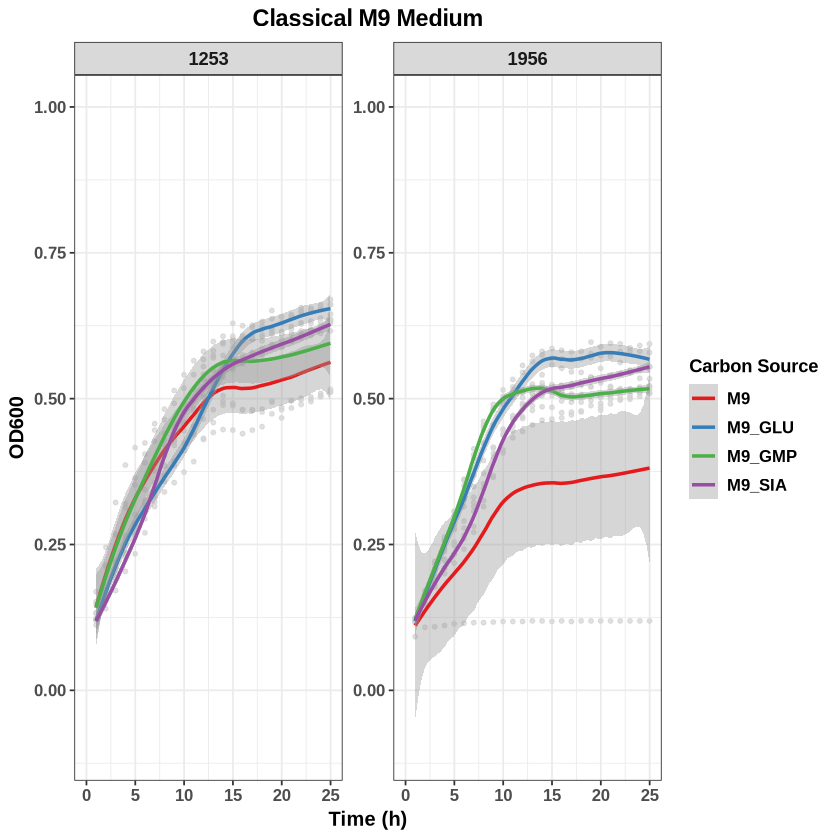

`geom_smooth()` using formula = 'y ~ x'
Warning message:
“Removed 240 rows containing non-finite outside the scale range (`stat_smooth()`).”
Warning message:
“Removed 240 rows containing missing values or values outside the scale range (`geom_point()`).”
`geom_smooth()` using formula = 'y ~ x'
Warning message:
“Removed 243 rows containing non-finite outside the scale range (`stat_smooth()`).”
Warning message:
“Removed 243 rows containing missing values or values outside the scale range (`geom_point()`).”


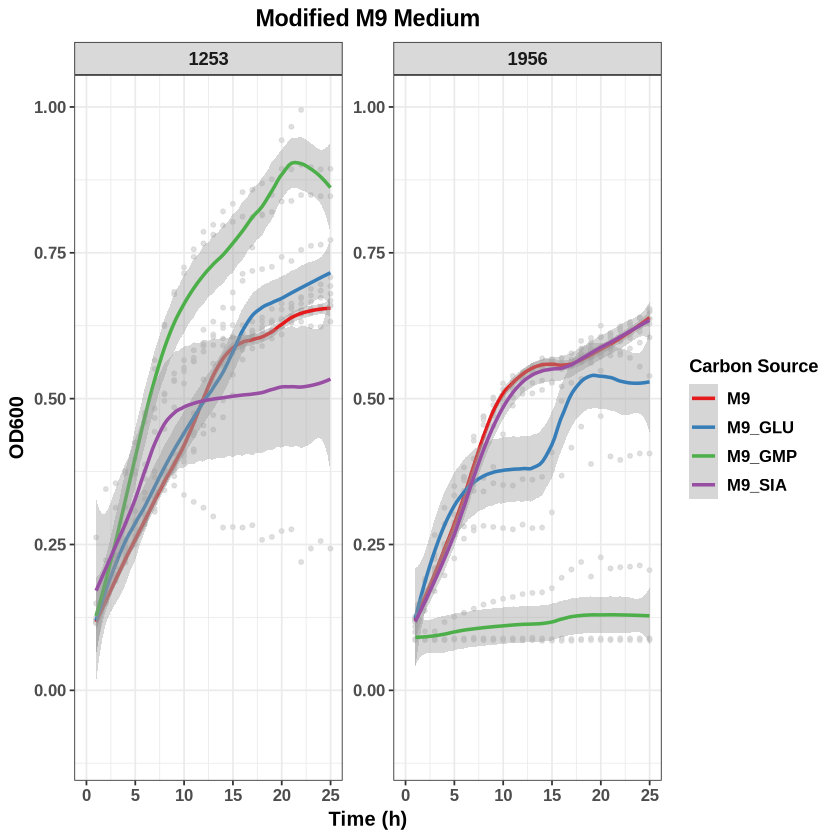

`geom_smooth()` using formula = 'y ~ x'
Warning message:
“Removed 240 rows containing non-finite outside the scale range (`stat_smooth()`).”
Warning message:
“Removed 240 rows containing missing values or values outside the scale range (`geom_point()`).”
`geom_smooth()` using formula = 'y ~ x'
Warning message:
“Removed 243 rows containing non-finite outside the scale range (`stat_smooth()`).”
Warning message:
“Removed 243 rows containing missing values or values outside the scale range (`geom_point()`).”


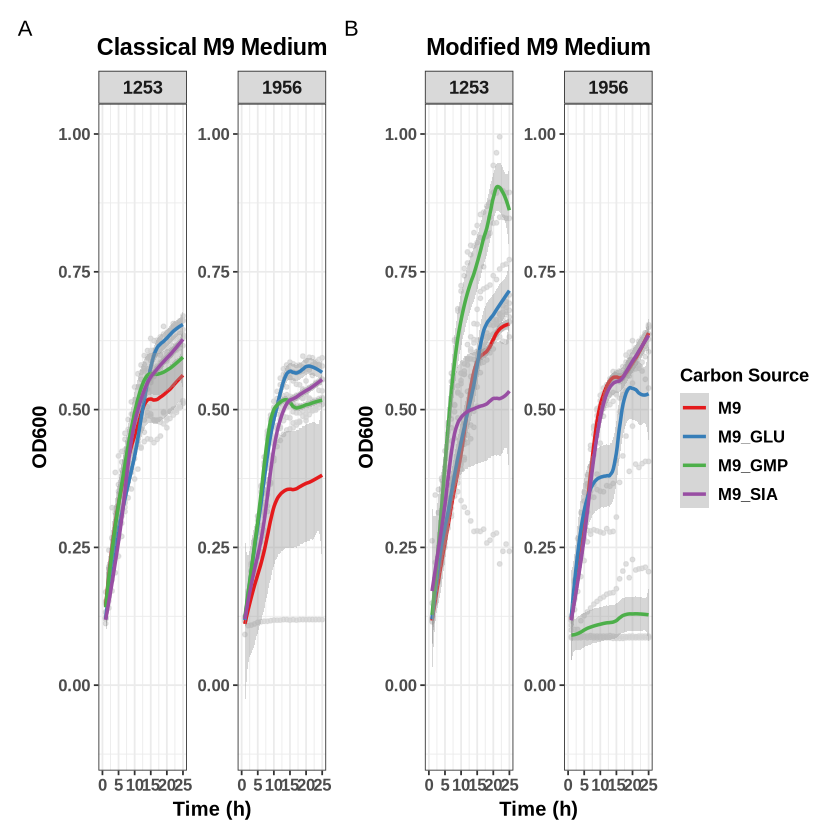

In [85]:
plotA <- ggplot(
  od_long_classical %>%
    filter(!is.na(Carbon), Carbon != "Blank"),  # remove blanks and NAs
  aes(x = Time, y = OD)
) +
  # Raw measurements in light gray
  geom_point(aes(group = Well), color = "lightgray", size = 1.0, alpha = 0.7) +
  # Loess trend colored by Carbon
  geom_smooth(aes(color = Carbon, group = Carbon),
              method = "loess", span = 0.3, se = TRUE, size = 1) +
  facet_wrap(~Strain, scales = "free_y") +
  scale_color_brewer(palette = "Set1") +
  labs(
    x = "Time (h)",
    y = "OD600",
    color = "Carbon Source",
    title = "Classical M9 Medium"
  ) +
  scale_y_continuous(limits = c(-0.1, 1)) +  # fix y-axis across all facets
  theme_bw() +
  theme(
    axis.title = element_text(face = "bold", size = 12),
    axis.text = element_text(face = "bold", size = 10),
    strip.text = element_text(face = "bold", size = 11),
    legend.title = element_text(face = "bold", size = 11),
    legend.text = element_text(face = "bold", size = 10),
    plot.title = element_text(face = "bold", size = 14, hjust = 0.5)
  )

plotA

plotB <- ggplot(
  od_long_modified %>%
    filter(!is.na(Carbon), Carbon != "Blank"),  # remove blanks and NAs
  aes(x = Time, y = OD)
) +
  # Raw measurements in light gray
  geom_point(aes(group = Well), color = "lightgray", size = 1.0, alpha = 0.7) +
  # Loess trend colored by Carbon
  geom_smooth(aes(color = Carbon, group = Carbon),
              method = "loess", span = 0.3, se = TRUE, size = 1) +
  facet_wrap(~Strain, scales = "free_y") +
  scale_color_brewer(palette = "Set1") +
  labs(
    x = "Time (h)",
    y = "OD600",
    color = "Carbon Source",
    title = "Modified M9 Medium"
  ) +
  scale_y_continuous(limits = c(-0.1, 1)) +  # fix y-axis across all facets
  theme_bw() +
  theme(
    axis.title = element_text(face = "bold", size = 12),
    axis.text = element_text(face = "bold", size = 10),
    strip.text = element_text(face = "bold", size = 11),
    legend.title = element_text(face = "bold", size = 11),
    legend.text = element_text(face = "bold", size = 10),
    plot.title = element_text(face = "bold", size = 14, hjust = 0.5)
  )

plotB

combined <- plotA + plotB + 
  plot_layout(guides = "collect") +  # collect legends from all plots
  plot_annotation(tag_levels = "A")  # label panels

combined

ggsave("combined_growth_curves_EPOCH2_24h.png", combined, width = 12, height = 6, dpi = 300)
